In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

import scienceplots
plt.style.use(['science'])

th_value = 2.197
th_err = 2.2e-6

In [5]:
dic_analog = np.load('data/muon_lifetime_analog.npy', allow_pickle=True).item()
tau = dic_analog['tau']
tau_err = dic_analog['tau_err']
chi2 = dic_analog['chi2']
method = dic_analog['method']

len_analog = len(tau)

dic_num = np.load('data/muon_lifetime_num.npy', allow_pickle=True).item()
tau = tau + dic_num['tau']
tau_err = tau_err + dic_num['tau_err']
chi2 = chi2 + dic_num['chi2']
method = method + dic_num['method']

len_num = len(tau) - len_analog

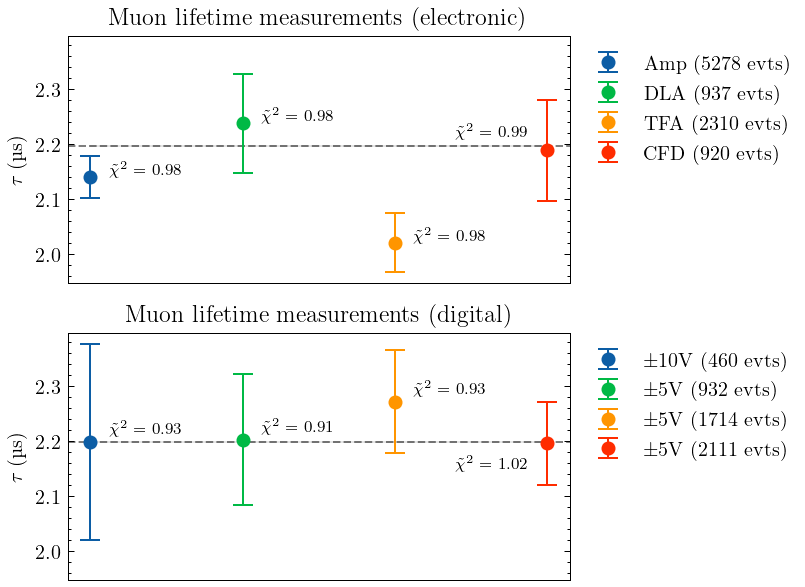

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(4.5, 5), sharex=True, sharey=True)

x_axis = np.linspace(0, 1, len_analog)

ax[0].axhline(th_value, ls='--', c='k', alpha=0.5)
ax[0].fill_between(x_axis, th_value-th_err, th_value+th_err, color='k', alpha=0.1)

ax[1].axhline(th_value, ls='--', c='k', alpha=0.5)
ax[1].fill_between(x_axis, th_value-th_err, th_value+th_err, color='k', alpha=0.1)


for i in range(len_analog):
    label = method[i]
    eb = ax[0].errorbar(x_axis[i], tau[i], yerr=tau_err[i], marker='o', ls='none', capsize=5, label=label)
    # eb[-1][0].set_linestyle('--') # Modify error bars linestyle
    if i == 3:
        ax[0].text(x_axis[i]-0.12, tau[i]+0.02, f'$\\tilde{{\chi}}^2$ = {chi2[i]:.2f}', fontsize=8, ha='center', va='bottom')
    else : 
        ax[0].text(x_axis[i]+0.12, tau[i], f'$\\tilde{{\chi}}^2$ = {chi2[i]:.2f}', fontsize=8, ha='center', va='bottom')
    
for i in range(len_analog, len_analog+len_num):
    label = method[i]
    eb = ax[1].errorbar(x_axis[i-len_num], tau[i], yerr=tau_err[i], marker='o', ls='none', capsize=5, label=label)
    # eb[-1][0].set_linestyle('--') # Modify error bars linestyle
    if i == 7:
        ax[1].text(x_axis[i-len_num]-0.12, tau[i]-0.05, f'$\\tilde{{\chi}}^2$ = {chi2[i]:.2f}', fontsize=8, ha='center', va='bottom')
    else : 
        ax[1].text(x_axis[i-len_num]+0.12, tau[i]+0.01, f'$\\tilde{{\chi}}^2$ = {chi2[i]:.2f}', fontsize=8, ha='center', va='bottom')
 
for i in range(len(ax)):   
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, framealpha=0.2)
    ax[i].set_ylabel(f'$\\tau_{{µ}}$ (µs)')
    ax[i].get_xaxis().set_visible(False)
    
ax[0].set_title('Muon lifetime measurements (electronic)')
ax[1].set_title('Muon lifetime measurements (digital)')
fig.set_facecolor('white');

plt.savefig('images/final_plot.png', dpi=300, bbox_inches='tight');